In [1]:
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem import Draw
import more_itertools as mit

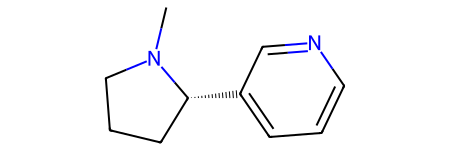

In [2]:
m = Chem.MolFromSmiles('CN1CCC[C@H]1c1cccnc1')
m

In [3]:
PTN_CARBON = Chem.MolFromSmarts('[#6]-[#6]')


def len_carbon(mol: Chem.Mol, ptn: Chem.Mol = PTN_CARBON) -> int | None:
    carbons = mol.GetSubstructMatches(ptn)
    return len(carbons) if carbons else None

In [4]:
# rdmolops.FindAllSubgraphsOfLengthMToN(m, 0, 10)

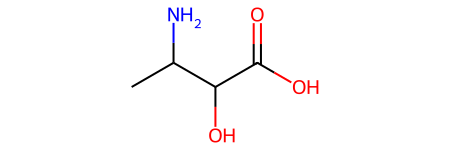

In [5]:
(p1 := Chem.MolFromSmiles('CC(N)C(O)C(O)=O'))

In [13]:
p1.HasSubstructMatch(
    Chem.MolFromSmarts(
        '[!$([#6]~[#6]~[#6]~[#6]~[#6]);#6;$([#6]~[!#1,!#6])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]~[#7,#8,#9,#15,#16,#17,#34,#35,#53])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]~[#7,#8,#9,#15,#16,#17,#34,#35,#53])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]~[#7,#8,#9,#15,#16,#17,#34,#35,#53])]'
    )
)

True

In [23]:
p1.HasSubstructMatch(smarts.MoleculeSmarts.C4_FG123.as_mol())

True

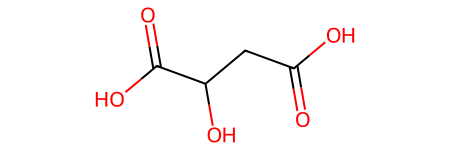

In [8]:
(n1 := Chem.MolFromSmiles('C(=O)(O)CC(O)C(O)=O'))

In [9]:
n1.HasSubstructMatch(
    Chem.MolFromSmarts(
        '[#6;!$([#6]-[#6]-[#6]-[#6]-[#6])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,P,F,Cl,Br,I])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,P,F,Cl,Br,I])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,P,F,Cl,Br,I])]'
    )
)

False

In [24]:
n1.HasSubstructMatch(smarts.MoleculeSmarts.C4_FG123.as_mol())

False

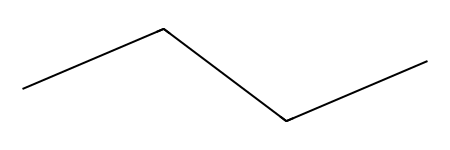

In [11]:
(n2 := Chem.MolFromSmiles('CCCC'))

In [25]:
n2.HasSubstructMatch(
    Chem.MolFromSmarts(
        '[#6;!$([#6]-[#6]-[#6]-[#6]-[#6])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
    )
)
n2.HasSubstructMatch(smarts.MoleculeSmarts.C4_FG123.as_mol())

False

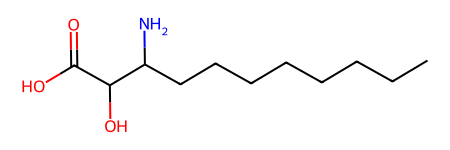

In [13]:
(n3 := Chem.MolFromSmiles('CCCCCCCCC(N)C(O)C(O)=O'))

In [14]:
n3.HasSubstructMatch(
    Chem.MolFromSmarts(
        '[#6;!$([#6]-[#6]-[#6]-[#6])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
    )
)

False

In [15]:
n3.HasSubstructMatch(
    Chem.MolFromSmarts(
        '[!$([#6]-[#6]-[#6]-[#6]);#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6]'
    )
)

False

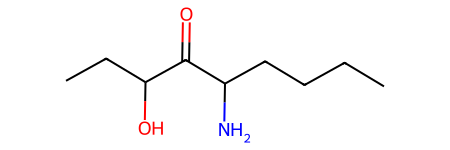

In [16]:
(n4 := Chem.MolFromSmiles('CCC(O)C(=O)C(N)CCCC'))

In [17]:
n4.HasSubstructMatch(
    Chem.MolFromSmarts(
        '[#6;!$([#6]-[#6]-[#6]-[#6]-[#6])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
        '!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[$(N),$(O),$(S),$(P),$(F),$(Cl),$(Br),$(I)])]'
    )
)

False

In [20]:
from src import smarts

In [19]:
smarts.MoleculeSmarts.C4_FG123

<MoleculeSMARTS.C4_FG123: '[!$([#6]!@[#6]!@[#6]!@[#6]!@[#6]);#6]!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,#15,#16,#17,#34,#35,#53])]!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,#15,#16,#17,#34,#35,#53])]!@[#6;$([#6]=[!#6]),$([#6]#[!#6]),$([#6]-[#7,#8,#9,#15,#16,#17,#34,#35,#53])]'>

In [14]:
from src.smarts import MoleculeSmarts

In [27]:
[mem.name for mem in MoleculeSmarts]

['C4_FG123', 'C5_FG125']